## Part 1

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. The data is located at:
http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/admissions.csv

### Question 1: 

Create a scatterplot for the data, so that admitted students and non-admitted students are plotted with a different symbol and different color with Test 1 on the $x$-axis and Test 2 on the $y$-axis. Does this data look appropriate for our Logistic Regression technique?

### Question 2: 

Perform a logistic regression on the data. Compute the decision boundary for the Logistic Regression and add the decision boundary to your scatterplot.

### Question 3: 

Report on the training accuracy of your Logistic Regression by computing the percentage of examples it got correct. 

In [259]:
# IMPORTS 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [260]:

'''Obtaining the data. Removing NA's, Breaking up the data into feature matrix and 
    dependant variable vector using dummies function''' 

URL = 'http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/admissions.csv'
df = pd.read_csv(URL)
df.columns=["Test1","Test2","Status"] # give the data frame column names

df.dropna(how="all", inplace=True) # drops the empty line at file-end

print(df.describe())  # to see what the spread of the data is and get a better understanding of it

'''change the status column into binary column of admitted and not admitted '''

X=df[['Test1','Test2']].to_numpy()  # Feature matrix of the test scores
y=pd.get_dummies(df,prefix=['Status'])['Status_admitted']  # output vector of admission status 
print(f'\nShape of X: {X.shape}\nShape of y: {y.shape}\n')
print(f'Head and Tail of Status column:\n{y.head()}\n{y.tail()}\n')
print(f'Head of scores matrix:\n{X[:5]}\nTail of Scores Matrix:\n{X[-5:]}')

            Test1       Test2
count  100.000000  100.000000
mean    65.644274   66.221998
std     19.458222   18.582783
min     30.058822   30.603263
25%     50.919511   48.179205
50%     67.032988   67.682381
75%     80.212529   79.360605
max     99.827858   98.869436

Shape of X: (100, 2)
Shape of y: (100,)

Head and Tail of Status column:
0    0
1    0
2    0
3    1
4    1
Name: Status_admitted, dtype: uint8
95    1
96    1
97    1
98    1
99    1
Name: Status_admitted, dtype: uint8

Head of scores matrix:
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Tail of Scores Matrix:
[[83.48916274 48.3802858 ]
 [42.26170081 87.10385094]
 [99.31500881 68.77540947]
 [55.34001756 64.93193801]
 [74.775893   89.5298129 ]]


 ### Question 2 - Linear Regression


In [261]:
## Perform the Logistic Regression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)  # Apply the Logistic Regression to the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0    0
1    0
2    0
3    1
4    1
Name: Status_admitted, dtype: uint8
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]



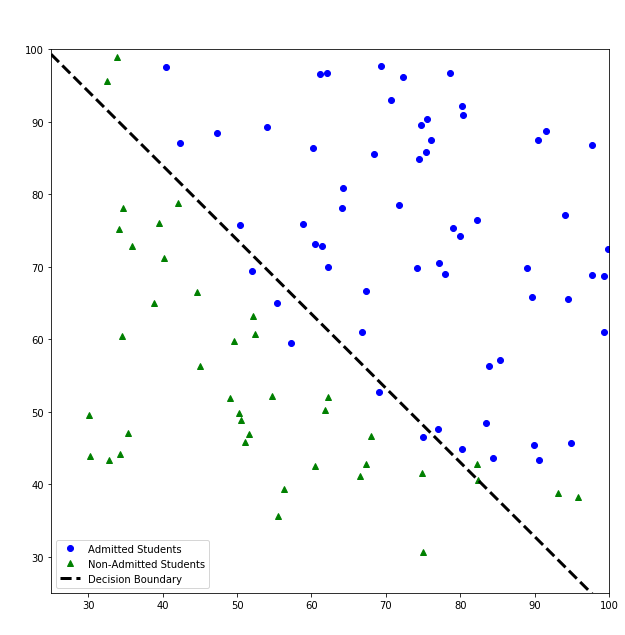

In [262]:

print(f'{y.head()}\n{X[:5]}\n')  # shows the admission status vector and the feature matrix


plt.figure(figsize=(10, 10)) # create the size of the chart 
'''Plotting the Test 1 scores vs Test 2 scores where admission status is 1 
    ie. admitted, in Blue Circles '''
plt.plot(X[y==1,0],X[y==1,1], "bo", label="Admitted Students")

'''Plotting the Test 1 scores vs Test 2 scores where admission status is 0 
    ie. not admitted, in Green Triangles'''
plt.plot(X[y==0,0],X[y==0,1], "g^",label="Non-Admitted Students")  

## plot decision boundary
left_right = np.array([25, 100])  # specify the X axis scale 
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3, label='Decision Boundary') # plot the decision boundary

## Label the graph
plt.xlabel("Test 1 Scores", fontsize=14,color='w')
plt.ylabel("Test 2 Scores", fontsize=14,color='w')


#give the plot a title
plt.title('Test 1 Scores Vs. Test 2 Scores\nDistinguished by Admission Status', fontsize=20,color='w')

plt.axis([25, 100,25,100]) # args are  x min, x max, y min, y max
plt.legend() # shows the legend 
plt.show()

## How many points did the algorithm get wrong?
Quite a few ... 11 wrong predictions.

In [263]:
y_pred=log_reg.predict(X) # Do the prediction for all the X values 
score=(y_pred==y) # keep track of how many predictions are correct 
score.value_counts() # tells us how many we got right 

True     89
False    11
Name: Status_admitted, dtype: int64

### Answer for Question 1 -
The data does seem to be separable into sections and therefore is appropriate for Logistic Regression

## Part 2
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips are likely to be working or faulty. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model. The data is located at http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/chip_test.csv

### Question 4: 

Create a scatterplot for the data, so that admitted chips and rejected chips are plotted with a different symbol and different color with Test1 on the $x$-axis and Test2 on the $y$-axis. Does this data look appropriate for our Logistic Regression technique?
#### Answer: 
The data has a large spread but little bias with working chips being concentric in the non working ones. Not suitable for Logistic Regression. 
### Question 5: 

Perform a logistic regression on the data. Compute the decision boundary for the Logistic Regression and add the decision boundary to your scatterplot.

### Question 6: 

Report on the training accuracy of your Logistic Regression by computing the percentage of examples it got correct. Explain why this did so poorly.

In [264]:
'''Obtaining the data. Removing NA's, Breaking up the data into feature matrix and 
    dependant variable vector using dummies function''' 

URL = 'http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/chip_test.csv'
df = pd.read_csv(URL)
df.columns=["Test1","Test2","Status"] # give the data frame column names

df.dropna(how="all", inplace=True) # drops the NA's

print(df.describe())  # to see what the spread of the data is and get a better understanding of it

'''change the status column into binary column of admitted and not admitted '''

X=df[['Test1','Test2']].to_numpy()  # Feature matrix of the test scores
y=pd.get_dummies(df,prefix=['Status'])['Status_working']  # output vector of admission status 

print(f'\nShape of X: {X.shape}\nShape of y: {y.shape}\n')
print(f'Head and Tail of Status column:\n{y.head()}\n{y.tail()}\n')
print(f'Head of scores matrix:\n{X[:5]}\nTail of Scores Matrix:\n{X[-5:]}')

            Test1       Test2
count  118.000000  118.000000
mean     0.054779    0.183102
std      0.496654    0.519743
min     -0.830070   -0.769740
25%     -0.372120   -0.254385
50%     -0.006336    0.213455
75%      0.478970    0.646562
max      1.070900    1.108900

Shape of X: (118, 2)
Shape of y: (118,)

Head and Tail of Status column:
0    1
1    1
2    1
3    1
4    1
Name: Status_working, dtype: uint8
113    0
114    0
115    0
116    0
117    0
Name: Status_working, dtype: uint8

Head of scores matrix:
[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Tail of Scores Matrix:
[[-0.72062    0.53874  ]
 [-0.59389    0.49488  ]
 [-0.48445    0.99927  ]
 [-0.0063364  0.99927  ]
 [ 0.63265   -0.030612 ]]


In [265]:
log_reg.fit(X, y) # re- run the fit for the new data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

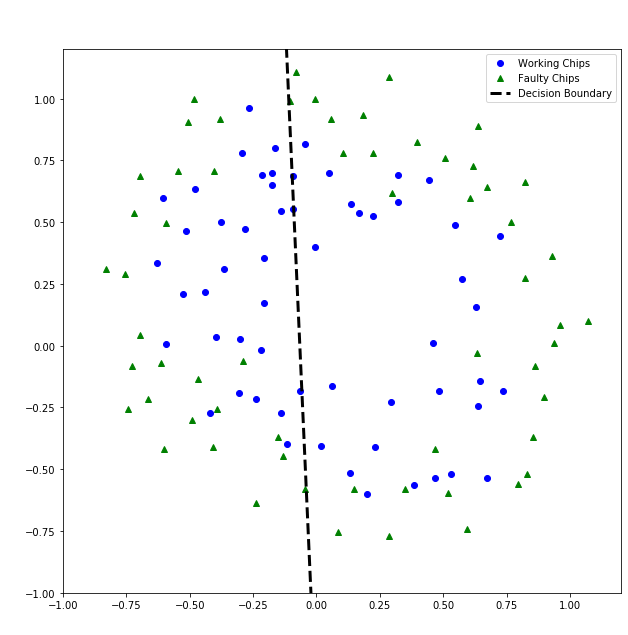

In [266]:
# SCATTER PLOT 

plt.figure(figsize=(10, 10)) # create the size of the chart 
'''Plotting the Test 1 scores vs Test 2 scores where chips are working Blue Circles '''
plt.plot(X[y==1,0],X[y==1,1], "bo", label="Working Chips")

'''Plotting the Test 1 scores vs Test 2 scores where chips are faulty in Green Triangles'''
plt.plot(X[y==0,0],X[y==0,1], "g^",label="Faulty Chips")  

## plot decision boundary
left_right = np.array([-1, 1.2])  # specify where the line should start and end roughly 
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3, label='Decision Boundary')

## Label the graph
plt.xlabel("Test 1 Scores", fontsize=14,color='w')
plt.ylabel("Test 2 Scores", fontsize=14,color='w')


#give the plot a title
plt.title('Test 1 Scores Vs. Test 2 Scores\nfor Working and Faulty Microprocessors', fontsize=20,color='w')

plt.axis([-1, 1.2,-1,1.2]) # x min, x max, y min, y max
plt.legend() # shows the legend 
plt.show()

## How many points did the algorithm do?
Pretty Poorly! ... 54 wrong predictions.

In [277]:
y_pred=log_reg.predict(X) # Do the prediction for all the X values 
score=(y_pred==y) # keep track of how many predictions are correct 
percent_true=score.value_counts('True')[1] *100  #
print(f'The Algorithm got {round(percent_true,4)}% correct.')


The Algorithm got 54.2373% correct.
